Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.3  
Zadnji put ažurirano: 6. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **19. 10. 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
y = y.reshape(len(y),1)
# print(X)
# print(y)

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje
polyAugm = PolynomialFeatures(1)
fi = polyAugm.fit_transform(X)
fi

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg
# Vaš kôd ovdje

w = np.matmul(np.matmul(linalg.inv(np.matmul(fi.T,fi)), fi.T), y)
print("w =", w)
w = np.matmul(linalg.pinv(fi), y)
print("w' =", w)


w = [[2.2       ]
 [0.45714286]]
w' = [[2.2       ]
 [0.45714286]]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [5]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje
D = np.hstack([X, y])
print("D =")
print(D)

h = np.matmul(fi, w)
print("h =")
print(h)

print("y = ")
print(y)

error = mean_squared_error(y, h)
print("E =", error)  # faktor 1/N (N=4)
print("E =", error*len(y)/2)  # faktor 1/2
print("E =", np.sum((h-y)**2)/len(y))  # faktor 1/N
print("E =", np.sum((h-y)**2)/2)  # faktor 1/2


D =
[[0 4]
 [1 1]
 [2 2]
 [4 5]]
h =
[[2.2       ]
 [2.65714286]
 [3.11428571]
 [4.02857143]]
y = 
[[4]
 [1]
 [2]
 [5]]
E = 2.042857142857143
E = 4.085714285714286
E = 2.042857142857143
E = 4.085714285714286


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [12]:
# Vaš kôd ovdje

# ne radi w = inv(fi)*y <- fi nije kvadratna
# print(linalg.inv(fi))
# w = np.matmul(linalg.inv(fi), y)
    

polyAugm = PolynomialFeatures(len(X)-1)
fi_new = polyAugm.fit_transform(X)
print("fi = ")
print(fi_new)
print("y = ")
print(y)
print("X = ")
print(X)

print("rang(fi) =", linalg.matrix_rank(fi_new))
print("rang(fi|y) =", linalg.matrix_rank(np.hstack([fi_new, y])))
w = np.matmul(linalg.inv(fi_new), y)
print("w = inv(fi)*y =")
print(w)


# print("------- Nekonzistentan sustav: -----")
# # protuprimjer 1 - nekonzistentan sustav: ima primjere (1, 1) i (1, 6)
# print("X1 = ")
# X1 = np.array([[0],[1],[1],[4]])
# print("y1 = ")
# y1 = np.array([[4],[1],[6],[5]])
# print(X1)
# print(y1)
# fi_new1 = polyAugm.fit_transform(X1)
# print("fi1 = ")
# print(fi_new1)
# print("y1 = ")
# print(y1)

# print("rang(fi1) =", linalg.matrix_rank(fi_new1))
# print("rang(fi|y1) =", linalg.matrix_rank(np.hstack([fi_new1, y1])))
# w1 = np.matmul(linalg.inv(fi_new1), y1)
# print("w1 = inv(fi1)*y1 =")
# print(w1)


# print("------- Sustav s beskonacno rjesenja: -----")
# # protuprimjer 1 - ima isti primjer (1, 6) 2x
# X1 = np.array([[0],[1],[1],[4]])
# y1 = np.array([[4],[6],[6],[5]])
# print("X1 = ")
# print(X1)
# print("y1 = ")
# print(y1)
# fi_new1 = polyAugm.fit_transform(X1)
# print("fi1 = ")
# print(fi_new1)
# print("y1 = ")
# print(y1)

# print("rang(fi1) =", linalg.matrix_rank(fi_new1))
# print("rang(fi|y1) =", linalg.matrix_rank(np.hstack([fi_new1, y1])))
# w1 = np.matmul(linalg.inv(fi_new1), y1)
# print("w1 = inv(fi1)*y1 =")
# print(w1)



fi = 
[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]
y = 
[[4]
 [1]
 [2]
 [5]]
X = 
[[0]
 [1]
 [2]
 [4]]
rang(fi) = 4
rang(fi|y) = 4
w = inv(fi)*y =
[[ 4.        ]
 [-5.91666667]
 [ 3.375     ]
 [-0.45833333]]


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [15]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje

# za podzad. d)
reg = LinearRegression().fit(fi_new[:, 1:], y)
print("w1 w2 w3 =",reg.coef_)
print("w0 =",reg.intercept_)

print()
# za podzad. c)
print(X)
reg = LinearRegression().fit(X, y)
print("w1 =",reg.coef_)
print("w0 =",reg.intercept_)
h = reg.predict(X)
print("h = ",h)
err = mean_squared_error(y, h)
print("err = ",err)    # ista greska kao i u c)


w1 w2 w3 = [[-5.91666667  3.375      -0.45833333]]
w0 = [4.]

[[0]
 [1]
 [2]
 [4]]
w1 = [[0.45714286]]
w0 = [2.2]
h =  [[2.2       ]
 [2.65714286]
 [3.11428571]
 [4.02857143]]
err =  2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [16]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    norm_noise = np.random.normal(0, noise, len(X)).reshape(len(X),-1)
    y = f(X) + norm_noise
    
    return y

In [17]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [18]:
# Vaš kôd ovdje
X = make_instances(x1=-5, x2=5, N=50)
print("X =")
print(X)

f = lambda x: 5 + x - 2*x**2 - 5*x**3
y = make_labels(X, f, noise=200)

print("y =")
print(y)

X =
[[-5.        ]
 [-4.79591837]
 [-4.59183673]
 [-4.3877551 ]
 [-4.18367347]
 [-3.97959184]
 [-3.7755102 ]
 [-3.57142857]
 [-3.36734694]
 [-3.16326531]
 [-2.95918367]
 [-2.75510204]
 [-2.55102041]
 [-2.34693878]
 [-2.14285714]
 [-1.93877551]
 [-1.73469388]
 [-1.53061224]
 [-1.32653061]
 [-1.12244898]
 [-0.91836735]
 [-0.71428571]
 [-0.51020408]
 [-0.30612245]
 [-0.10204082]
 [ 0.10204082]
 [ 0.30612245]
 [ 0.51020408]
 [ 0.71428571]
 [ 0.91836735]
 [ 1.12244898]
 [ 1.32653061]
 [ 1.53061224]
 [ 1.73469388]
 [ 1.93877551]
 [ 2.14285714]
 [ 2.34693878]
 [ 2.55102041]
 [ 2.75510204]
 [ 2.95918367]
 [ 3.16326531]
 [ 3.36734694]
 [ 3.57142857]
 [ 3.7755102 ]
 [ 3.97959184]
 [ 4.18367347]
 [ 4.3877551 ]
 [ 4.59183673]
 [ 4.79591837]
 [ 5.        ]]
y =
[[ 389.71046545]
 [ 764.30626077]
 [ 650.36235424]
 [ 553.88998665]
 [ 367.65650077]
 [ 320.32843329]
 [ -63.74179966]
 [ 268.29399061]
 [ 164.75429775]
 [ 224.32938351]
 [ 300.98368064]
 [ 443.35880865]
 [-196.74622477]
 [ -81.23165173]
 [ 

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

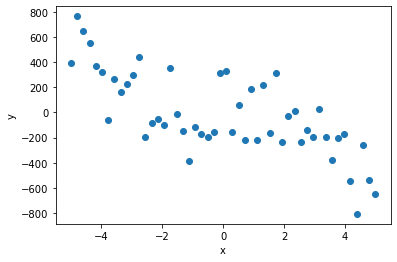

In [19]:
# Vaš kôd ovdje
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

w1 w2 w3 = [[12.79918074  1.26697432 -5.91460948]]
w0 = [-25.84768157]
err =  36694.560670309824


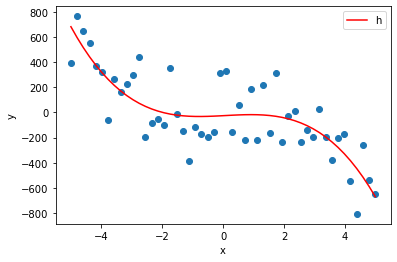

In [21]:
# Vaš kôd ovdje
poly = PolynomialFeatures(3)
fi3 = poly.fit_transform(X)[:,1:]

reg = LinearRegression().fit(fi3, y)
print("w1 w2 w3 =",reg.coef_)
print("w0 =",reg.intercept_)
h = reg.predict(fi3)
# print("h = ",h)
err = mean_squared_error(y, h)
print("err = ",err)

plt.scatter(X, y)
plt.plot(X, h, "r", label="h")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

E(h1) = 50816.03077772965
E(h3) = 36694.560670309824
E(h5) = 35663.124018787086
E(h10) = 30880.987342168777
E(h20) = 20096.250296951926


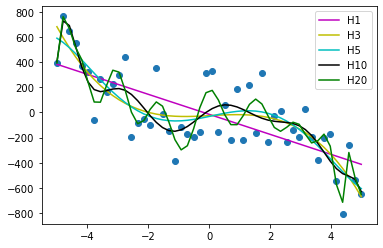

In [24]:
# Vaš kôd ovdje
plt.scatter(X, y)

for (d, c) in zip([1, 3, 5, 10, 20], ['m-', 'y-', 'c-', 'k-', 'g-']):
    poly = PolynomialFeatures(d)
    fi = poly.fit_transform(X)[:,1:]
    
    reg = LinearRegression().fit(fi, y)
    
    h = reg.predict(fi)
    plt.plot(X, h, c, label="H"+str(d))
    
    err =  mean_squared_error(y, h)
    print(f"E(h{d}) = {err}")
    
plt.legend(loc="best")
plt.show()
    

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

E_train = [34636.65805325703, 27326.69697445984, 18900.147143125843, 17564.624027997874, 17536.925617333258, 17454.95739691635, 15714.89070786997, 15495.359157538516, 13421.72217421686, 10671.467421451951, 10164.329951670972, 9447.372836424089, 8201.376771041418, 7877.077048203584, 6951.9348637998055, 4333.821761081618, 3755.0999061145967, 3055.267356453806, 2774.714727914384, 2462.3618638345188]
E_test = [68982.36202388846, 90873.07004939625, 68042.59390997708, 71323.87692930351, 71971.1993284875, 72375.83189493949, 76821.84138449366, 75247.5847469595, 124513.88008289476, 162985.22861664314, 119016.11976280776, 844506.1356023157, 14668860.713140259, 856742.0695431365, 152000816.02536878, 2433679823.297089, 50583189.91666668, 21586405038.030586, 205934626757.1884, 2569442816014.5728]
d = argmin(E_train) = 20
d = argmin(E_test) = 3


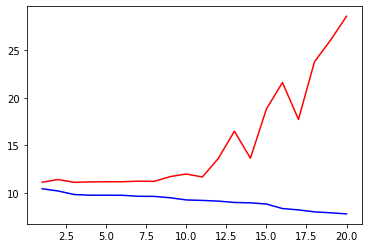

In [26]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

E_train, E_test = [], []
for d in range(1, 21):
    # model
    poly = PolynomialFeatures(d)
    fi_train = poly.fit_transform(X_train)[:,1:]
#     print("fi_train ", fi_train)
    
    # --- TRAIN --- 
    reg = LinearRegression().fit(fi_train, y_train)
    
    # E train
    h_train = reg.predict(fi_train)
    err_train = mean_squared_error(y_train, h_train)
    E_train.append(err_train)
    
    
    # --- TEST --- 
    fi_test = poly.fit_transform(X_test)[:,1:]
    
    # E test
    h_test = reg.predict(fi_test)
    err_train = mean_squared_error(y_test, h_test)
    E_test.append(err_train)
    
print("E_train =",E_train)
print("E_test =",E_test)

    
print("d = argmin(E_train) =", np.argmin(E_train)+1)
print("d = argmin(E_test) =", np.argmin(E_test)+1)

plt.plot(range(1, 21), np.log(E_train), 'b-', label="E_train")
plt.plot(range(1, 21), np.log(E_test), 'r-', label="E_test")
plt.show()


### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

++++++++++++++ sigma = 100
---- N = 166
d = argmin(E_train) = 20
d = argmin(E_test) = 3
---- N = 333
d = argmin(E_train) = 20
d = argmin(E_test) = 3
---- N = 500
d = argmin(E_train) = 20
d = argmin(E_test) = 3
++++++++++++++ sigma = 200
---- N = 166
d = argmin(E_train) = 20
d = argmin(E_test) = 4
---- N = 333
d = argmin(E_train) = 20
d = argmin(E_test) = 4
---- N = 500
d = argmin(E_train) = 20
d = argmin(E_test) = 4
++++++++++++++ sigma = 500
---- N = 166
d = argmin(E_train) = 20
d = argmin(E_test) = 2
---- N = 333
d = argmin(E_train) = 20
d = argmin(E_test) = 1
---- N = 500
d = argmin(E_train) = 20
d = argmin(E_test) = 3


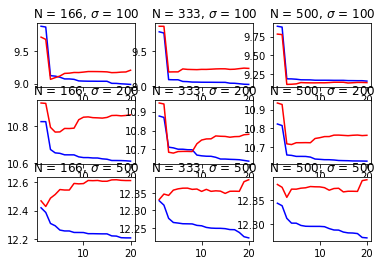

In [27]:
# Vaš kôd ovdje
from numpy.random import default_rng

N_ex = 1000
train_part = 0.5
X = make_instances(x1=-5, x2=5, N=N_ex)

X_train, X_test = train_test_split(X, train_size=train_part)

f = lambda x: 5 + x - 2*x**2 - 5*x**3
noise_levs = [100, 200, 500]

N_train_ex = int(train_part * N_ex)

rand_num_gen = default_rng()
N_one_third = rand_num_gen.choice(range(0, N_train_ex), size=int(N_train_ex/3), replace=False)
N_two_third = rand_num_gen.choice(range(0, N_train_ex), size=int(2*N_train_ex/3), replace=False)
N_inds = [N_one_third, N_two_third, None]

# print(N_one_third)
# print(N_two_third)


subplot_ind = 1
for noise_l in noise_levs:
    print("++++++++++++++ sigma =", noise_l)
    y_train = make_labels(X_train, f, noise=noise_l)
    y_test = make_labels(X_test, f, noise=noise_l)
    
    for n_i in N_inds:
        if n_i is not None:
            ex_count = len(n_i)
            sample_X_train = np.take(X_train, n_i).reshape(ex_count, -1)
            sample_X_test = np.take(X_test, n_i).reshape(ex_count, -1)
            sample_y_train = np.take(y_train, n_i).reshape(ex_count, -1)
            sample_y_test = np.take(y_test, n_i).reshape(ex_count, -1)
        else:
            sample_X_train = X_train
            sample_X_test = X_test
            sample_y_train = y_train
            sample_y_test = y_test
            
        print("---- N =", len(sample_X_train))
    
            
        sample_E_train, sample_E_test = [], []
        for d in range(1, 21):
            # model
            poly = PolynomialFeatures(d)
            sample_fi_train = poly.fit_transform(sample_X_train)[:,1:]

            reg = LinearRegression().fit(sample_fi_train, sample_y_train)

            # E train
            sample_h_train = reg.predict(sample_fi_train)
            sample_err_train = mean_squared_error(sample_y_train, sample_h_train)
#             print(sample_err_train)
            sample_E_train.append(sample_err_train)


            # --- TEST --- 
            sample_fi_test = poly.fit_transform(sample_X_test)[:,1:]

            # E test
            sample_h_test = reg.predict(sample_fi_test)
            sample_err_test = mean_squared_error(sample_y_test, sample_h_test)
#             print(sample_err_test)
            sample_E_test.append(sample_err_test)
        
#         print(sample_E_train)
#         print(sample_E_test)
        print("d = argmin(E_train) =", np.argmin(sample_E_train)+1)
#         print("   min = ", np.min(sample_E_train))
        print("d = argmin(E_test) =", np.argmin(sample_E_test)+1)
#         print("   min = ", np.min(sample_E_test))
        
        plt.subplot(3,3,subplot_ind,title="N = {}, $\sigma$ = {}".format(len(sample_X_train), noise_l))
        
#         plt.xlim(0, 21)
#         plt.ylim(8, 14)
        plt.plot(range(1, 21), np.log(sample_E_train), 'b-', label="E_train")
        plt.plot(range(1, 21), np.log(sample_E_test), 'r-', label="E_test")

        subplot_ind += 1


plt.show()




-- 0
d = argmin(E_train) = 20
d = argmin(E_test) = 3
-- 1
d = argmin(E_train) = 20
d = argmin(E_test) = 3
-- 2
d = argmin(E_train) = 20
d = argmin(E_test) = 3
-- 3
d = argmin(E_train) = 20
d = argmin(E_test) = 3
-- 4
d = argmin(E_train) = 20
d = argmin(E_test) = 3
-- 5
d = argmin(E_train) = 20
d = argmin(E_test) = 3
-- 6
d = argmin(E_train) = 20
d = argmin(E_test) = 3
-- 7
d = argmin(E_train) = 20
d = argmin(E_test) = 3
-- 8
d = argmin(E_train) = 20
d = argmin(E_test) = 3


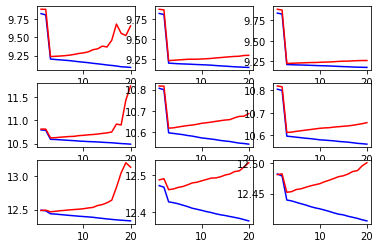

In [28]:
## dodatni test stabilnosti rjesenja: prosjek preko npr. 50 pokretanja
N_ex = 1000
train_part = 0.5
X = make_instances(x1=-5, x2=5, N=N_ex)



f = lambda x: 5 + x - 2*x**2 - 5*x**3
noise_levs = [100, 200, 500]


E_train_main_lst, E_test_main_lst = [], []

for i in range(50):
    X_train, X_test = train_test_split(X, train_size=train_part)
    
    E_train_lst, E_test_lst = [], []
    
    N_train_ex = int(train_part * N_ex)
    N_one_third = rand_num_gen.choice(range(0, N_train_ex), size=int(N_train_ex/3), replace=False)
    N_two_third = rand_num_gen.choice(range(0, N_train_ex), size=int(2*N_train_ex/3), replace=False)
    N_inds = [N_one_third, N_two_third, None]

    for noise_l in noise_levs:
        y_train = make_labels(X_train, f, noise=noise_l)
        y_test = make_labels(X_test, f, noise=noise_l)

        for n_i in N_inds:


            if n_i is not None:
                ex_count = len(n_i)
                sample_X_train = np.take(X_train, n_i).reshape(ex_count, -1)
                sample_X_test = np.take(X_test, n_i).reshape(ex_count, -1)
                sample_y_train = np.take(y_train, n_i).reshape(ex_count, -1)
                sample_y_test = np.take(y_test, n_i).reshape(ex_count, -1)
            else:
                sample_X_train = X_train
                sample_X_test = X_test
                sample_y_train = y_train
                sample_y_test = y_test
                

            sample_E_train, sample_E_test = [], []
            for d in range(1, 21):
                # model
                poly = PolynomialFeatures(d)
                sample_fi_train = poly.fit_transform(sample_X_train)[:,1:]

                reg = LinearRegression().fit(sample_fi_train, sample_y_train)

                # E train
                sample_h_train = reg.predict(sample_fi_train)
                sample_err_train = mean_squared_error(sample_y_train, sample_h_train)
    #             print(sample_err_train)
                sample_E_train.append(sample_err_train)


                # --- TEST --- 
                sample_fi_test = poly.fit_transform(sample_X_test)[:,1:]

                # E test
                sample_h_test = reg.predict(sample_fi_test)
                sample_err_test = mean_squared_error(sample_y_test, sample_h_test)
    #             print(sample_err_test)
                sample_E_test.append(sample_err_test)
        
        
            E_train_lst.append(sample_E_train)
            E_test_lst.append(sample_E_test)
    E_train_main_lst.append(E_train_lst)
    E_test_main_lst.append(E_test_lst)
            

E_train_mean = np.mean(np.array(E_train_main_lst), axis=0)
E_test_mean = np.mean(np.array(E_test_main_lst), axis=0)

subplot_ind = 1
for i in range(len(E_train_mean)):
    train_comb_i, test_comb_i = E_train_mean[i], E_test_mean[i]
    

    print("--",i)
    print("d = argmin(E_train) =", np.argmin(train_comb_i)+1)
#     print("   min = ", np.min(train_comb_i))
    print("d = argmin(E_test) =", np.argmin(test_comb_i)+1)
#     print("   min = ", np.min(test_comb_i))

    plt.subplot(3,3,subplot_ind)#,title="N = {}, $\sigma$ = {}".format(len(sample_X_train), noise_l))
    plt.plot(range(1, 21), np.log(train_comb_i), 'b-', label="E_train")
    plt.plot(range(1, 21), np.log(test_comb_i), 'r-', label="E_test")

    subplot_ind += 1


plt.show()


***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [29]:
# Vaš kôd ovdje
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
y = y.reshape(len(y),1)

m = 3

polyAugm = PolynomialFeatures(m)
fi = polyAugm.fit_transform(X)
print(fi)


reg_factors = [0, 1, 10]
for reg_fact in reg_factors:
    print("--- lambda =", reg_fact)
    
    reg_matrix = reg_fact*np.eye(m+1)
    reg_matrix[0][0] = 0
    print(reg_matrix)

    w = np.matmul(np.matmul(linalg.inv(np.matmul(fi.T,fi) + reg_matrix), fi.T), y)
    print("w = ", w)
    print()


[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]
--- lambda = 0
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
w =  [[ 4.        ]
 [-5.91666667]
 [ 3.375     ]
 [-0.45833333]]

--- lambda = 1
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
w =  [[ 3.05696145]
 [-0.69079365]
 [-0.2831746 ]
 [ 0.1445805 ]]

--- lambda = 10
[[ 0.  0.  0.  0.]
 [ 0. 10.  0.  0.]
 [ 0.  0. 10.  0.]
 [ 0.  0.  0. 10.]]
w =  [[ 2.49444184]
 [-0.15897295]
 [-0.13423067]
 [ 0.0815601 ]]



### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [31]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

reg_factors = [0, 1, 10]
for reg_fact in reg_factors:
    print("--- lambda =", reg_fact)
        
    reg = Ridge(alpha=reg_fact).fit(fi[:, 1:], y)
    print("w1 w2 w3 =",reg.coef_)
    print("w0 =",reg.intercept_)
    print()


--- lambda = 0
w1 w2 w3 = [[-5.91666667  3.375      -0.45833333]]
w0 = [4.]

--- lambda = 1
w1 w2 w3 = [[-0.69079365 -0.2831746   0.1445805 ]]
w0 = [3.05696145]

--- lambda = 10
w1 w2 w3 = [[-0.15897295 -0.13423067  0.0815601 ]]
w0 = [2.49444184]



### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

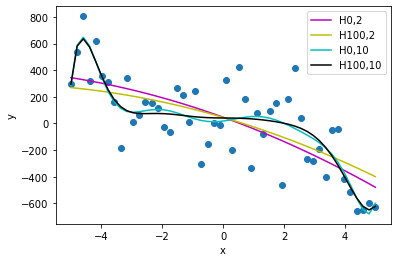

In [33]:
# Vaš kôd ovdje
X = make_instances(x1=-5, x2=5, N=50)
# print("X =")
# print(X)

f = lambda x: 5 + x - 2*x**2 - 5*x**3
y = make_labels(X, f, noise=200)


plt.scatter(X, y)

reg_factors = [0, 100]
colors = ['m-', 'y-', 'c-', 'k-']
col_ind = 0
for d in [2, 10]:
    poly = PolynomialFeatures(d)
    fi = poly.fit_transform(X)[:,1:]
    
    for reg_fact in reg_factors:
        reg = Ridge(alpha=reg_fact).fit(fi, y)

        h = reg.predict(fi)
        plt.plot(X, h, colors[col_ind], label=f"H{reg_fact},{d}")
        col_ind += 1
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="best")
plt.show()
    

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


d = argmin(E_train) = 0
d = argmin(E_test) = 3


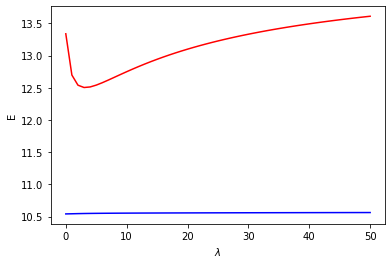

In [141]:
# Vaš kôd ovdje
d = 10

reg_matrix = np.eye(d+1)
reg_matrix[0][0] = 0


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
poly = PolynomialFeatures(d)
fi_train_init = poly.fit_transform(X_train)
fi_train = fi_train_init[:,1:]

LAMBDA_MIN = 0
LAMBDA_MAX = 50
reg_factors = range(LAMBDA_MIN, LAMBDA_MAX+1)

E_train, E_test = [], []
for reg_fact in reg_factors:

     # --- TRAIN --- 
    reg = Ridge(alpha=reg_fact).fit(fi_train, y_train)
    
    
    # E train
    h_train = reg.predict(fi_train)
    err_train = mean_squared_error(y_train, h_train)
    E_train.append(err_train)
    
    
    # --- TEST --- 
    fi_test = poly.fit_transform(X_test)[:,1:]
    
    # E test
    h_test = reg.predict(fi_test)
    err_test = mean_squared_error(y_test, h_test)
    E_test.append(err_test)
    
    

# print(E_train)
# print(E_test)

print("d = argmin(E_train) =", np.argmin(E_train))
print("d = argmin(E_test) =", np.argmin(E_test))

plt.plot(reg_factors, np.log(E_train), 'b-', label="E_train")
plt.plot(reg_factors, np.log(E_test), 'r-', label="E_test")


plt.xlabel("$\lambda$")
plt.ylabel("E")
#plt.xlim(LAMBDA_MAX, LAMBDA_MIN)
plt.show()



### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [143]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

--- L2 ---
[28.725597027065884, 26.320278111963898, 24.318640058796095, 22.628607803195692, 21.184025571225174, 19.936141209993046, 18.84824078316415, 17.89215273351681, 17.04590328705472, 16.292103787199586, 15.616816559269473, 15.00874144428607, 14.458621980186424, 13.958805015469382, 13.502909412366147, 13.085573562985372, 12.702260679678758, 12.34910700414865, 12.02280229101155, 11.720494835613732, 11.439715362075384, 11.178315543871905, 10.93441797878534, 10.706375205268008, 10.492735911218652, 10.292216906038222, 10.103679742383084, 9.926111113290416, 9.758606333287743, 9.600355353061744, 9.450630866688568, 9.308778155984085, 9.174206383838422, 9.046381101719549, 8.924817778978923, 8.809076195621445, 8.69875556758935, 8.59349029579385, 8.492946248165472, 8.396817498741482, 8.304823459911173, 8.216706353921431, 8.132228978001308, 8.051172724330023, 7.9733358218010055, 7.898531771321587, 7.826587950420546, 7.757344366322387, 7.690652539521478, 7.62637450231613, 7.564381898837529, 7

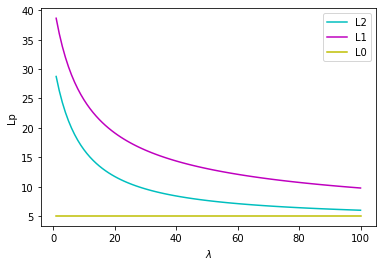

In [144]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
X = make_instances(x1=-5, x2=5, N=50)
# print("X =")
# print(X)

f = lambda x: 5 + x - 2*x**2 - 5*x**3
y = make_labels(X, f, noise=200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

d = 5

poly = PolynomialFeatures(d)
fi_train_init = poly.fit_transform(X_train)
fi_train = fi_train_init[:,1:]

LAMBDA_MIN = 1
LAMBDA_MAX = 100
reg_factors = range(LAMBDA_MIN, LAMBDA_MAX+1)

L2_norm = lambda wj : np.sqrt(np.sum(wj**2))
L1_norm = lambda wj : np.sum(np.abs(wj))
L0_norm = nonzeroes


L2_norm_lst = []
L1_norm_lst = []
L0_norm_lst = []

reg_matrix = np.eye(d+1)
reg_matrix[0][0] = 0

for reg_fact in reg_factors:
     # --- TRAIN --- 
    reg = Ridge(alpha=reg_fact).fit(fi_train, y_train)
#     print(reg.coef_)

    w = reg.coef_.reshape(d,-1)  # w0 - ne regularizira se

#     w = np.matmul(np.matmul(linalg.inv(np.matmul(fi_train_init.T,fi_train_init) + reg_fact*reg_matrix), fi_train_init.T), y_train)[1:]
#     print("1:", w00)
#     print("2:", w)

    
    L2n, L1n, L0n = L2_norm(w), L1_norm(w), L0_norm(w)
    
    L2_norm_lst.append(L2n)
    L1_norm_lst.append(L1n)
    L0_norm_lst.append(L0n)
    
#     print(w)
#     print(L2n, L1n, L0n)
    


print("--- L2 ---")
print(L2_norm_lst)
print("--- L1 ---")
print(L1_norm_lst)
print("--- L0 ---")
print(L0_norm_lst)
# print("d = argmin(L2_norm) =", np.argmin(L2_norm_lst))
# print("d = argmin(L1_norm) =", np.argmin(L1_norm_lst))
# print("d = argmin(L0_norm) =", np.argmin(L0_norm_lst))

    
plt.plot(reg_factors, L2_norm_lst, 'c-', label="L2")
plt.plot(reg_factors, L1_norm_lst, 'm-', label="L1")
plt.plot(reg_factors, L0_norm_lst, 'y-', label="L0")

plt.xlabel("$\lambda$")
plt.ylabel("Lp")
plt.legend(loc="best")
#plt.xlim(LAMBDA_MAX, LAMBDA_MIN)
plt.show()


### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

--- L2 ---
[28.869426540996017, 26.082658375179136, 23.309451654201627, 20.55436069080428, 17.824654011300275, 15.13654294659286, 12.51420173996052, 10.009503746899963, 7.741096315410813, 6.092483924704954, 5.316871637329935, 5.203720136207715, 5.098980269907534, 5.00622170782694, 4.934871702084658, 4.916627474102309, 4.855650728378473, 4.799821526864657, 4.753206571093797, 4.716709234798979, 4.6907777462397595, 4.675429167528078, 4.670817820940013, 4.65561066308849, 4.646672852028787, 4.637862714691074, 4.6288067954114425, 4.619881811834824, 4.611051289563517, 4.602293304494568, 4.593587112500688, 4.584411260672221, 4.5757466923770345, 4.56654010129746, 4.5579254140271885, 4.548753992931835, 4.540224341353147, 4.5311031581713115, 4.522636851269401, 4.513580706716085, 4.5045208800579575, 4.495387432603537, 4.4870234363712465, 4.477961217906553, 4.468977565667225, 4.459997991471924, 4.451119922271053, 4.442307124117712, 4.433539067816935, 4.424920363841657, 4.415537583974965, 4.40716029

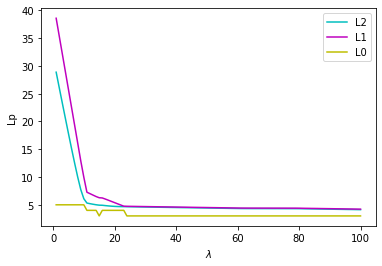

In [146]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje

L2_norm_lst = []
L1_norm_lst = []
L0_norm_lst = []

for reg_fact in reg_factors:
     # --- TRAIN --- 
    reg = Lasso(alpha=reg_fact, tol=0.001).fit(fi_train, y_train)
#     print(reg.coef_)

    w = reg.coef_.reshape(d,-1)  # w0 - ne regularizira se

    
    L2n, L1n, L0n = L2_norm(w), L1_norm(w), L0_norm(w)
    
    L2_norm_lst.append(L2n)
    L1_norm_lst.append(L1n)
    L0_norm_lst.append(L0n)
    
    


print("--- L2 ---")
print(L2_norm_lst)
print("--- L1 ---")
print(L1_norm_lst)
print("--- L0 ---")
print(L0_norm_lst)
# print("d = argmin(L2_norm) =", np.argmin(L2_norm_lst))
# print("d = argmin(L1_norm) =", np.argmin(L1_norm_lst))
# print("d = argmin(L0_norm) =", np.argmin(L0_norm_lst))

    
plt.plot(reg_factors, L2_norm_lst, 'c-', label="L2")
plt.plot(reg_factors, L1_norm_lst, 'm-', label="L1")
plt.plot(reg_factors, L0_norm_lst, 'y-', label="L0")

plt.xlabel("$\lambda$")
plt.ylabel("Lp")
plt.legend(loc="best")
#plt.xlim(LAMBDA_MAX, LAMBDA_MIN)
plt.show()
    

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [147]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

      
# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9  #0.1
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

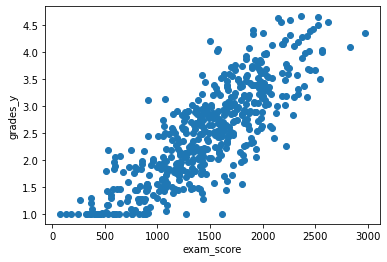

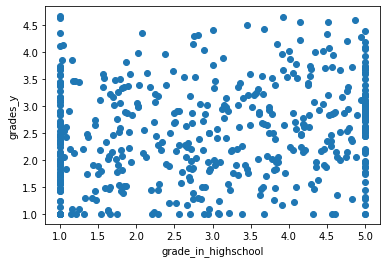

In [148]:
# Vaš kôd ovdje

plt.scatter(exam_score, grades_y)
plt.xlabel("exam_score")
plt.ylabel("grades_y")
plt.show()

plt.scatter(grade_in_highschool, grades_y)
plt.xlabel("grade_in_highschool")
plt.ylabel("grades_y")
plt.show()


### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

[0.00141497 0.09477276]
0.15061179575776018


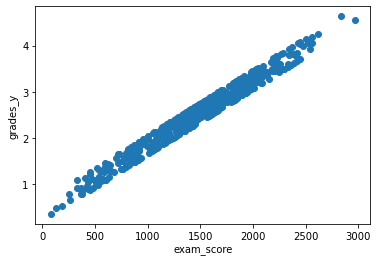

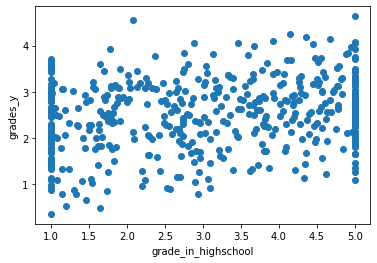

In [149]:
# Vaš kôd ovdje

reg = Ridge(alpha=0.01).fit(grades_X, grades_y)
print(reg.coef_)
print(reg.intercept_)

h = reg.predict(grades_X)

plt.scatter(grades_X[:,0], h)
plt.xlabel("exam_score")
plt.ylabel("grades_y")
plt.show()

plt.scatter(grades_X[:,1], h)
plt.xlabel("grade_in_highschool")
plt.ylabel("grades_y")
plt.show()


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

[[0.81630375 0.15167761]]
[8.62551331e-17]


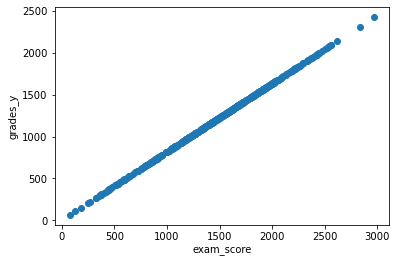

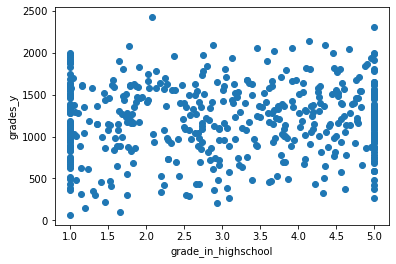

In [151]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje
grades_y_tmp = grades_y.reshape(n_data_points,-1)

data_scaler = StandardScaler()

data_scaler.fit(grades_X)
grades_X_fixed = data_scaler.transform(grades_X)

data_scaler.fit(grades_y_tmp)
grades_y_fixed = data_scaler.transform(grades_y_tmp)
##grades_y_fixed = data_scaler.fit(grades_y)
# print(grades_X)
# print(grades_X_fixed)
# print(grades_y_tmp)
# print(grades_y_fixed)

reg = Ridge(alpha=0.01).fit(grades_X_fixed, grades_y_fixed)
print(reg.coef_)
print(reg.intercept_)


h = reg.predict(grades_X)

plt.scatter(grades_X[:,0], h)
plt.xlabel("exam_score")
plt.ylabel("grades_y")
plt.show()

plt.scatter(grades_X[:,1], h)
plt.xlabel("grade_in_highschool")
plt.ylabel("grades_y")
plt.show()

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [152]:
# Vaš kôd ovdje
grades_X_fixed_colinear = np.hstack([grades_X_fixed, grades_X_fixed[:,1].reshape(n_data_points,-1)])
print(grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

[[0.81630364 0.07583957 0.07583957]]
[8.6255971e-17]


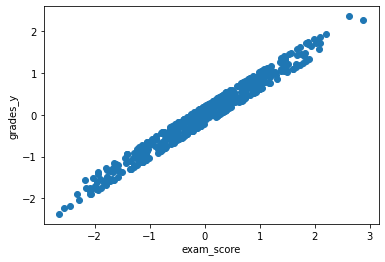

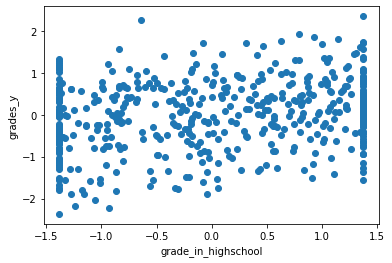

In [154]:
# Vaš kôd ovdje
reg = Ridge(alpha=0.01).fit(grades_X_fixed_colinear, grades_y_fixed)
print(reg.coef_)
print(reg.intercept_)


h = reg.predict(grades_X_fixed_colinear)

plt.scatter(grades_X_fixed_colinear[:,0], h)
plt.xlabel("exam_score")
plt.ylabel("grades_y")
plt.show()

plt.scatter(grades_X_fixed_colinear[:,1], h)
plt.xlabel("grade_in_highschool")
plt.ylabel("grades_y")
plt.show()

**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [175]:
# Vaš kôd ovdje

reg_factors = [0.01, 1000]
w_per_lambda =  [[] for i in range(len(reg_factors))]



rand_num_gen = default_rng()

for i in range(10):
#     subset_grades_X_fixed_colinear, _, subset_grades_y_fixed, _ = train_test_split(grades_X_fixed_colinear, grades_y_fixed, train_size=0.5)

    N_half = rand_num_gen.choice(range(0, n_data_points), size=int(n_data_points/2), replace=False)
    subset_grades_X_fixed_colinear = np.take(grades_X_fixed_colinear, N_half,axis=0)
    subset_grades_y_fixed = np.take(grades_y_fixed, N_half,axis=0)
    
    for i in range(len(reg_factors)):
        reg_fact = reg_factors[i]
        reg = Ridge(alpha=reg_fact).fit(subset_grades_X_fixed_colinear, subset_grades_y_fixed)
#         print(reg.coef_, reg.intercept_)
        w = reg.coef_
        w0 = reg.intercept_.reshape(-1,1)
        w_all = np.hstack([w0, w]).flatten() # w0, w1, w2, w3
        w_per_lambda[i].append(w_all)
        
w_per_lambda = np.array(w_per_lambda)
#w_per_lambda.shape (2, 10, 4) = (2 models, 10 reps, 3 features)
print("w =")
print(w_per_lambda)
print("+++")
w3_stddev = np.std(w_per_lambda[:,:,1:], axis=1, dtype=np.float64)
w3_mean = np.mean(w_per_lambda[:,:,1:], axis=1, dtype=np.float64)

print("mean =")
for i in range(len(reg_factors)):
    reg_fact = reg_factors[i]
    print(f"lambda = {reg_fact}:", w3_mean[i])
    
print()
print("stddev =")
for i in range(len(reg_factors)):
    reg_fact = reg_factors[i]
    print(f"lambda = {reg_fact}:", w3_stddev[i])


w =
[[[ 3.35642725e-02  8.06744035e-01  6.93687376e-02  6.93687376e-02]
  [-4.01452276e-02  8.23036069e-01  6.16562876e-02  6.16562876e-02]
  [ 5.00475803e-02  8.41230162e-01  9.52471450e-02  9.52471450e-02]
  [-2.59964243e-02  8.14020210e-01  7.58767222e-02  7.58767222e-02]
  [-3.56723408e-03  8.22336984e-01  8.32506585e-02  8.32506585e-02]
  [ 5.03826606e-02  8.37747768e-01  8.36201275e-02  8.36201275e-02]
  [-2.04889097e-03  8.25331073e-01  8.00721418e-02  8.00721418e-02]
  [ 4.30461025e-02  8.56303782e-01  6.42418270e-02  6.42418270e-02]
  [ 4.49807680e-03  8.10084094e-01  7.59324603e-02  7.59324603e-02]
  [ 1.41711275e-02  8.01190313e-01  8.23580228e-02  8.23580228e-02]]

 [[ 3.89996785e-04  1.65964396e-01  2.87411770e-02  2.87411770e-02]
  [-6.96959674e-02  1.67078068e-01  3.40547662e-02  3.40547662e-02]
  [ 8.69601789e-02  1.62489226e-01  3.91146959e-02  3.91146959e-02]
  [ 2.85616614e-03  1.64468880e-01  2.89703668e-02  2.89703668e-02]
  [ 4.97390326e-02  1.69876567e-01  4.0716

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.